In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import catboost
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [2]:
data=pd.read_csv('train_phoneclassification.csv')


In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
data.shape

(2000, 21)

In [9]:
def lesscorr(data,target,thres):
  set1=set()
  df=data.corr()
  for i in data.columns:
      if abs(df.loc[i,target]<thres):
        set1.add(i)
  return set1

LC=lesscorr(data,'price_range',0.1)

In [10]:
LC

{'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi'}

<AxesSubplot:>

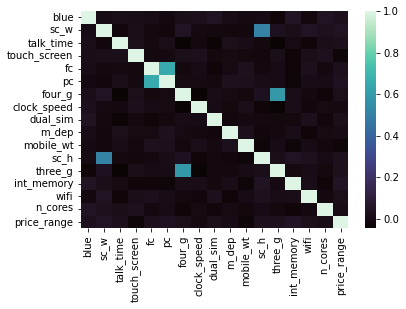

In [11]:
sb.heatmap(data[[i for i in LC]+['price_range']].corr(),cmap='mako')


In [12]:
len(LC),len(data.columns)


(16, 21)

In [13]:
new=[]
for i in data.columns:
  if i not in LC:
    new.append(i)

newdata=data[new]

In [14]:
newdata

,battery_power,px_height,px_width,ram,price_range
0,842,20,756,2549,1
1,1021,905,1988,2631,2
2,563,1263,1716,2603,2
3,615,1216,1786,2769,2
4,1821,1208,1212,1411,1
...,...,...,...,...,...
1995,794,1222,1890,668,0
1996,1965,915,1965,2032,2
1997,1911,868,1632,3057,3
1998,1512,336,670,869,0


<AxesSubplot:>

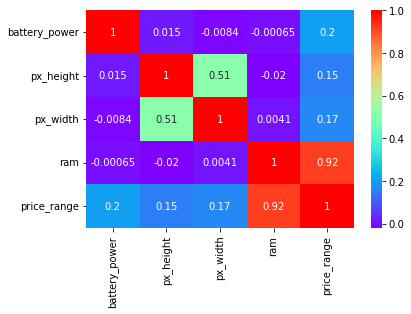

In [15]:
sb.heatmap(newdata.corr(),annot=True,cmap='rainbow')


In [16]:
sol=newdata.describe().transpose()


In [17]:
sol

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5185,439.418206,501.0,851.75,1226.0,1615.25,1998.0
px_height,2000.0,645.1080,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.5155,432.199447,500.0,874.75,1247.0,1633.00,1998.0
ram,2000.0,2124.2130,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0
price_range,2000.0,1.5000,1.118314,0.0,0.75,1.5,2.25,3.0


In [18]:
sol1=sol[['mean','50%']]


In [19]:
sol1

,mean,50%
battery_power,1238.5185,1226.0
px_height,645.1080,564.0
px_width,1251.5155,1247.0
ram,2124.2130,2146.5
price_range,1.5000,1.5


# Function For Finding Skewness

In [20]:
def func(rec):
  a=rec['mean']
  b=rec['50%']
  if a>b:
    return 'RightSkewness'
  else:
    return 'LeftSkewness'

sol1['Skewness Type']=sol1.apply(func,axis=1)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_32820\1210341092.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sol1['Skewness Type']=sol1.apply(func,axis=1)


In [21]:
sol1

,mean,50%,Skewness Type
battery_power,1238.5185,1226.0,RightSkewness
px_height,645.1080,564.0,RightSkewness
px_width,1251.5155,1247.0,RightSkewness
ram,2124.2130,2146.5,LeftSkewness
price_range,1.5000,1.5,LeftSkewness


In [22]:
newdata

,battery_power,px_height,px_width,ram,price_range
0,842,20,756,2549,1
1,1021,905,1988,2631,2
2,563,1263,1716,2603,2
3,615,1216,1786,2769,2
4,1821,1208,1212,1411,1
...,...,...,...,...,...
1995,794,1222,1890,668,0
1996,1965,915,1965,2032,2
1997,1911,868,1632,3057,3
1998,1512,336,670,869,0


<Figure size 432x288 with 0 Axes>

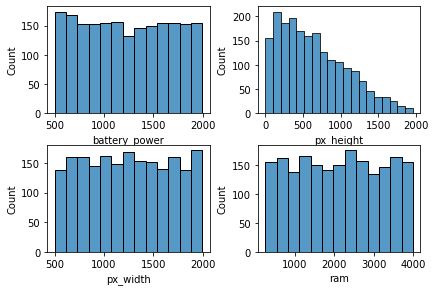

In [23]:
fig=plt.figure()
fig,axes=plt.subplots(2,2)
fig.tight_layout()
ind=sol1.index
count=0
for i in range(2):
  for j in range(2):
    sb.histplot(data=newdata,x=ind[count],ax=axes[i][j])
    count+=1

    if count==4:
      break
  if count==4:
      break

In [24]:
for i in newdata.columns:
  print(i,":",newdata[i].nunique())

battery_power : 1094
px_height : 1137
px_width : 1109
ram : 1562
price_range : 4


In [25]:
newdata.shape


(2000, 5)

In [26]:
pi1=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model1',RandomForestClassifier())])
pi2=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model2',DecisionTreeClassifier())])
pi3=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model3',BaggingClassifier())])
pi4=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model4',CatBoostClassifier())])
pi5=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model5',LogisticRegression())])
pi6=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model6',SVC())])
pi7=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model7',KNeighborsClassifier())])
pi8=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model7',xgb.XGBClassifier())])


In [27]:
y=newdata['price_range']
x=newdata.drop('price_range',axis=1)

In [28]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [29]:
x

,battery_power,px_height,px_width,ram
0,842,20,756,2549
1,1021,905,1988,2631
2,563,1263,1716,2603
3,615,1216,1786,2769
4,1821,1208,1212,1411
...,...,...,...,...
1995,794,1222,1890,668
1996,1965,915,1965,2032
1997,1911,868,1632,3057
1998,1512,336,670,869


In [30]:
xtra,xtest,ytra,ytest=train_test_split(x,y,test_size=0.2)


In [31]:
xtra.shape

(1600, 4)

In [32]:
xtest.shape

(400, 4)

In [33]:
list1=[pi1,pi2,pi3,pi4,pi5,pi6,pi7]
for i in list1:
  i.fit(xtra,ytra)

Learning rate set to 0.081046
0:	learn: 1.2725893	total: 152ms	remaining: 2m 32s
1:	learn: 1.1705359	total: 157ms	remaining: 1m 18s
2:	learn: 1.0875725	total: 163ms	remaining: 54.3s
3:	learn: 1.0147182	total: 169ms	remaining: 42s
4:	learn: 0.9487351	total: 172ms	remaining: 34.3s
5:	learn: 0.8895177	total: 176ms	remaining: 29.2s
6:	learn: 0.8478130	total: 181ms	remaining: 25.7s
7:	learn: 0.7992088	total: 187ms	remaining: 23.2s
8:	learn: 0.7617371	total: 190ms	remaining: 21s
9:	learn: 0.7248985	total: 193ms	remaining: 19.2s
10:	learn: 0.6901947	total: 197ms	remaining: 17.7s
11:	learn: 0.6589586	total: 200ms	remaining: 16.5s
12:	learn: 0.6314431	total: 204ms	remaining: 15.5s
13:	learn: 0.6051688	total: 207ms	remaining: 14.6s
14:	learn: 0.5818592	total: 210ms	remaining: 13.8s
15:	learn: 0.5590664	total: 214ms	remaining: 13.1s
16:	learn: 0.5376630	total: 217ms	remaining: 12.5s
17:	learn: 0.5186577	total: 220ms	remaining: 12s
18:	learn: 0.5007042	total: 223ms	remaining: 11.5s
19:	learn: 0.48

In [34]:
c1=cross_val_score(pi1,xtest,ytest,cv=5,verbose=2,scoring='accuracy')
c2=cross_val_score(pi2,xtest,ytest,cv=5,verbose=0,scoring='accuracy')
c3=cross_val_score(pi3,xtest,ytest,cv=5,verbose=0,scoring='accuracy')
c4=cross_val_score(pi4,xtest,ytest,cv=5,verbose=0,scoring='accuracy')
c5=cross_val_score(pi5,xtest,ytest,cv=5,verbose=0,scoring='accuracy')
c6=cross_val_score(pi6,xtest,ytest,cv=5,verbose=0,scoring='accuracy')
c7=cross_val_score(pi7,xtest,ytest,cv=5,verbose=0,scoring='accuracy')
c8=cross_val_score(pi8,xtest,ytest,cv=5,verbose=0,scoring='accuracy')


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Learning rate set to 0.07466
0:	learn: 1.3212066	total: 7.91ms	remaining: 7.91s
1:	learn: 1.2642946	total: 14.8ms	remaining: 7.37s
2:	learn: 1.2016323	total: 22.2ms	remaining: 7.38s
3:	learn: 1.1358533	total: 29.8ms	remaining: 7.43s
4:	learn: 1.0767681	total: 36.9ms	remaining: 7.34s
5:	learn: 1.0255152	total: 45.2ms	remaining: 7.49s
6:	learn: 0.9891954	total: 53.8ms	remaining: 7.63s
7:	learn: 0.9593696	total: 62.4ms	remaining: 7.74s
8:	learn: 0.9248602	total: 71.1ms	remaining: 7.83s
9:	learn: 0.8833563	total: 78.2ms	remaining: 7.74s
10:	learn: 0.8461702	total: 84.1ms	remaining: 7.56s
11:	

In [35]:
list3=[c1,c2,c3,c4,c5,c6,c7,c8]
list2=['RandomForestClassifier','DecisionTreeClassifier','BaggingClassifier','CatBoostClassifier','LogisticRegression','SVC','KNeighborsClassifier','XGBClassifier']

In [36]:
print('Cross_Val_Scores')
for i in range(len(list3)):
  print(list2[i],":",list3[i],'Mean :',"{:.2f}".format(list3[i].mean()))


Cross_Val_Scores
RandomForestClassifier : [0.85   0.9375 0.9    0.85   0.9125] Mean : 0.89
DecisionTreeClassifier : [0.825  0.8375 0.825  0.825  0.825 ] Mean : 0.83
BaggingClassifier : [0.8375 0.9125 0.875  0.825  0.8875] Mean : 0.87
CatBoostClassifier : [0.875 0.95  0.875 0.875 0.95 ] Mean : 0.91
LogisticRegression : [0.7875 0.9125 0.875  0.825  0.8875] Mean : 0.86
SVC : [0.8625 0.95   0.925  0.85   0.95  ] Mean : 0.91
KNeighborsClassifier : [0.8375 0.8625 0.8125 0.775  0.9   ] Mean : 0.84
XGBClassifier : [0.875  0.95   0.85   0.8625 0.9375] Mean : 0.89
